### Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling)
1.ANN--->GLobal Minima, Gradient
2.CNN
3.RNN

0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/test-file


In [7]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,34.5,7.8292
1,1,3,47.0,7.0000
2,0,2,62.0,9.6875
3,0,3,27.0,8.6625
4,1,3,22.0,12.2875


In [10]:
df['Age'].fillna(df.Age.median(),inplace=True)
df['Fare'].fillna(df.Age.mean(),inplace=True)

<ipython-input-10-1261451803>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)
<ipython-input-10-1261451803>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [11]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
Fare,0


In [38]:
### Independent and dependent features
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
X

,Pclass,Age,Fare
0,3,34.5,7.8292
1,3,47.0,7.0000
2,2,62.0,9.6875
3,3,27.0,8.6625
4,3,22.0,12.2875
...,...,...,...
413,3,27.0,8.0500
414,1,39.0,108.9000
415,3,38.5,7.2500
416,3,27.0,8.0500


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train

,Pclass,Age,Fare
109,2,18.5,13.0000
176,2,20.0,36.7500
366,3,27.0,14.4583
407,1,50.0,211.5000
280,3,23.0,8.6625
...,...,...,...
71,3,21.0,7.8958
106,3,21.0,7.8208
270,1,46.0,75.2417
348,2,24.0,13.5000


In [42]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [44]:
X_train_scaled

array([[-3.17799463e-01, -8.70240411e-01, -4.08000550e-01],
       [-3.17799463e-01, -7.56249695e-01, -1.13575183e-02],
       [ 8.68651866e-01, -2.24293019e-01, -3.83645833e-01],
       [-1.50425079e+00,  1.52356463e+00,  2.90710016e+00],
       [ 8.68651866e-01, -5.28268262e-01, -4.80440093e-01],
       [ 8.68651866e-01, -2.24293019e-01, -4.93244565e-01],
       [ 8.68651866e-01, -2.24293019e-01, -5.04377292e-01],
       [-3.17799463e-01,  7.96822248e-02, -2.74394476e-01],
       [-1.50425079e+00,  3.83657468e-01,  2.90710016e+00],
       [-1.50425079e+00,  2.31669847e-01, -1.62152014e-01],
       [-3.17799463e-01, -7.23053970e-02, -1.90890680e-01],
       [ 8.68651866e-01,  4.59651279e-01, -4.66453208e-01],
       [-1.50425079e+00,  5.35645090e-01,  7.63696327e-01],
       [ 8.68651866e-01, -2.24293019e-01, -4.95679536e-01],
       [-1.50425079e+00,  1.37157701e+00,  6.97589711e-01],
       [-1.50425079e+00,  2.20750893e+00,  2.34631305e-01],
       [-1.50425079e+00,  1.82753987e+00

In [45]:
X_test_scaled=scaler.transform(X_test)

In [46]:
X_test_scaled

array([[ 8.68651866e-01, -3.76280640e-01, -5.04377292e-01],
       [-1.50425079e+00,  6.87632712e-01,  2.90438628e+00],
       [ 8.68651866e-01, -6.80255884e-01, -4.95679536e-01],
       [ 8.68651866e-01,  3.83657468e-01, -4.93244565e-01],
       [ 8.68651866e-01,  4.59651279e-01, -4.21640060e-01],
       [-3.17799463e-01,  1.52356463e+00, -1.90890680e-01],
       [ 8.68651866e-01, -7.23053970e-02, -4.92756903e-01],
       [-1.50425079e+00,  1.44757082e+00, -1.90890680e-01],
       [-3.17799463e-01, -8.32243506e-01, -4.08000550e-01],
       [ 8.68651866e-01, -2.24293019e-01, -4.90669308e-01],
       [ 8.68651866e-01, -6.80255884e-01, -2.21787085e-01],
       [-1.50425079e+00,  1.59955844e+00,  3.28994936e-02],
       [ 8.68651866e-01, -1.06022494e+00, -4.82875064e-01],
       [-1.50425079e+00,  6.87632712e-01,  1.19360226e+00],
       [ 8.68651866e-01, -2.24293019e-01, -4.90669308e-01],
       [ 8.68651866e-01, -2.24293019e-01,  3.18412333e-01],
       [ 8.68651866e-01, -1.48299208e-01

In [47]:
### Model Building
## fit() for training and predict for test

In [48]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [49]:
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
classification.predict(X_test_scaled)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0])

In [24]:
df_scaled=df_scaled.transform(df)

NameError: name 'df_scaled' is not defined

In [ ]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

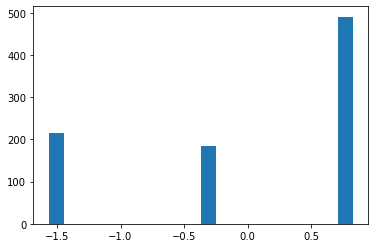

In [ ]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

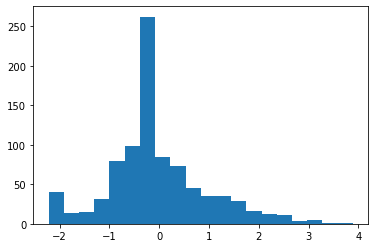

In [ ]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

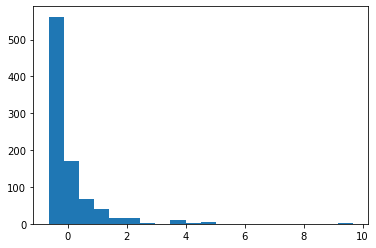

In [ ]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

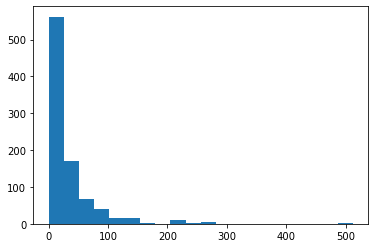

In [ ]:
plt.hist(df['Fare'],bins=20)

##### Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.5,0.240122,0.025374
1,0.5,0.259944,0.071731
2,1.0,0.352451,0.028221
3,0.0,0.656403,0.412821
4,1.0,0.299590,0.016908


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

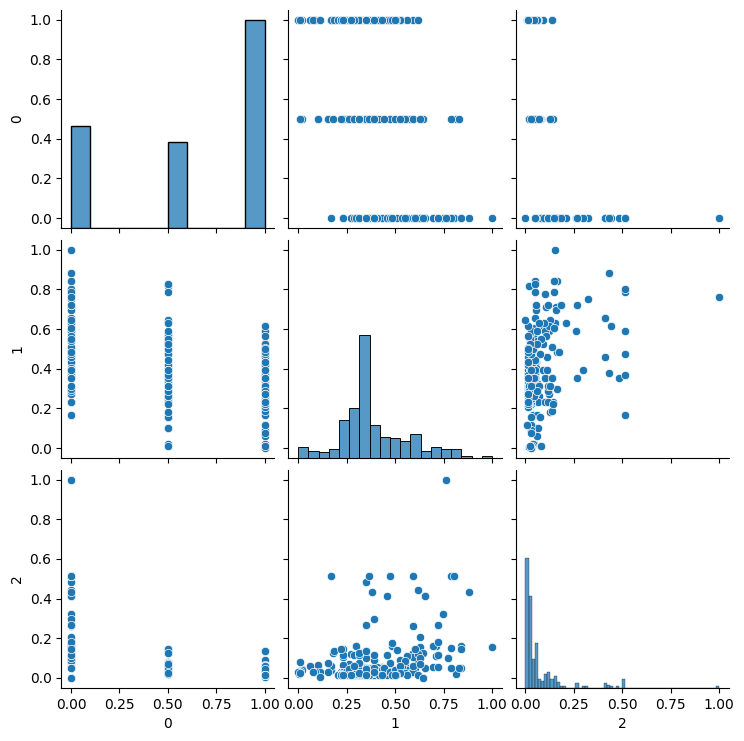

In [54]:
sns.pairplot(df_minmax)

In [55]:
df_minmax.head()

,0,1,2
0,0.5,0.240122,0.025374
1,0.5,0.259944,0.071731
2,1.0,0.352451,0.028221
3,0.0,0.656403,0.412821
4,1.0,0.299590,0.016908


(array([ 72.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

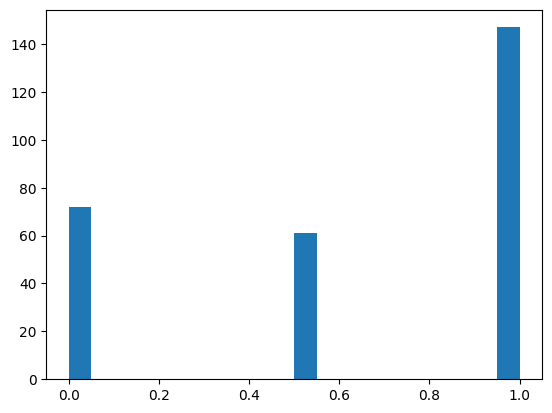

In [57]:
plt.hist(df_minmax[0],bins=20)

(array([ 8.,  3.,  4.,  7., 21., 33., 22., 91., 12., 16., 10., 16., 12.,
         5.,  7.,  5.,  6.,  1.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

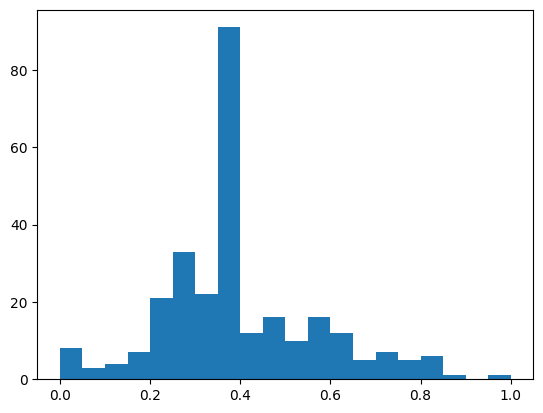

In [58]:
plt.hist(df_minmax[1],bins=20)

(array([177.,  44.,  29.,  10.,   1.,   4.,   1.,   0.,   6.,   1.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

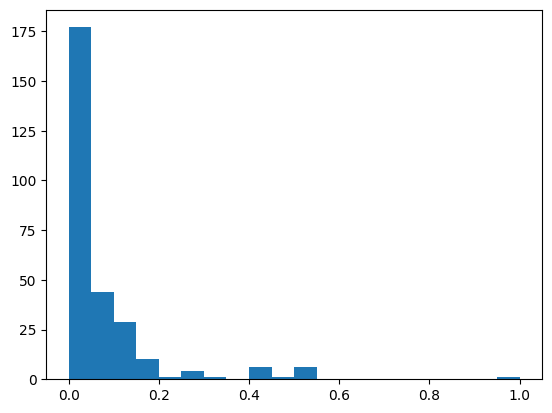

In [59]:
plt.hist(df_minmax[2],bins=20)

##### Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-0.5,-0.641509,-0.055406
1,-0.5,-0.528302,0.821854
2,0.0,0.000000,-0.001540
3,-1.0,1.735849,7.276636
4,0.0,-0.301887,-0.215621


In [62]:
scaler.transform(X_test)

array([[ 0.        , -0.1509434 , -0.26856327],
       [-1.        ,  0.90566038,  7.2706336 ],
       [ 0.        , -0.45283019, -0.24932636],
       [ 0.        ,  0.60377358, -0.24394091],
       [ 0.        ,  0.67924528, -0.0855725 ],
       [-0.5       ,  1.73584906,  0.42477824],
       [ 0.        ,  0.1509434 , -0.24286234],
       [-1.        ,  1.66037736,  0.42477824],
       [-0.5       , -0.60377358, -0.05540586],
       [ 0.        ,  0.        , -0.23824519],
       [ 0.        , -0.45283019,  0.35644435],
       [-1.        ,  1.81132075,  0.91973723],
       [ 0.        , -0.83018868, -0.22100658],
       [-1.        ,  0.90566038,  3.48687528],
       [ 0.        ,  0.        , -0.23824519],
       [ 0.        ,  0.        ,  1.55120886],
       [ 0.        ,  0.0754717 , -0.24840293],
       [-1.        ,  2.11320755,  1.31127195],
       [ 0.        , -1.28301887,  0.54020711],
       [-0.5       , -0.30188679, -0.14774895],
       [-0.5       ,  2.26415094, -0.055

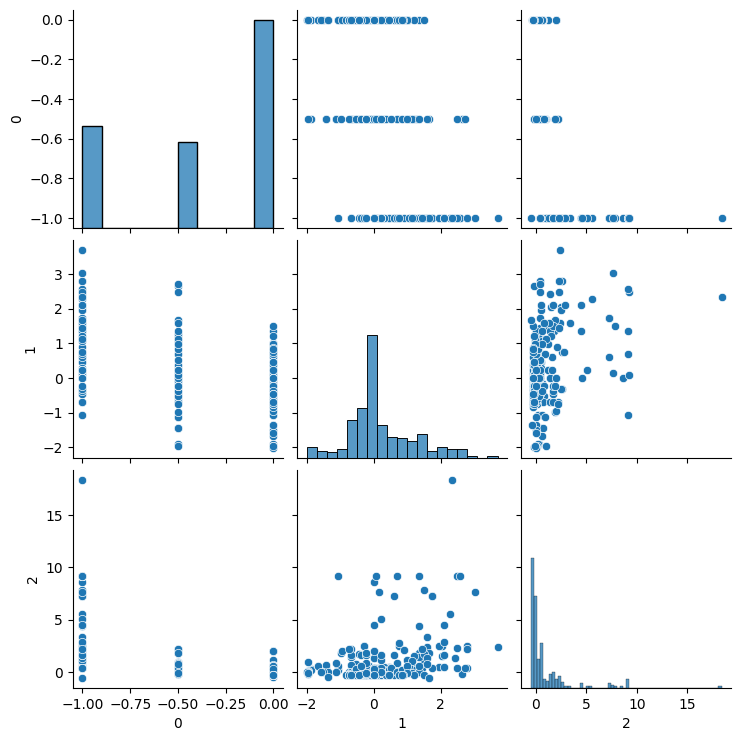

In [63]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

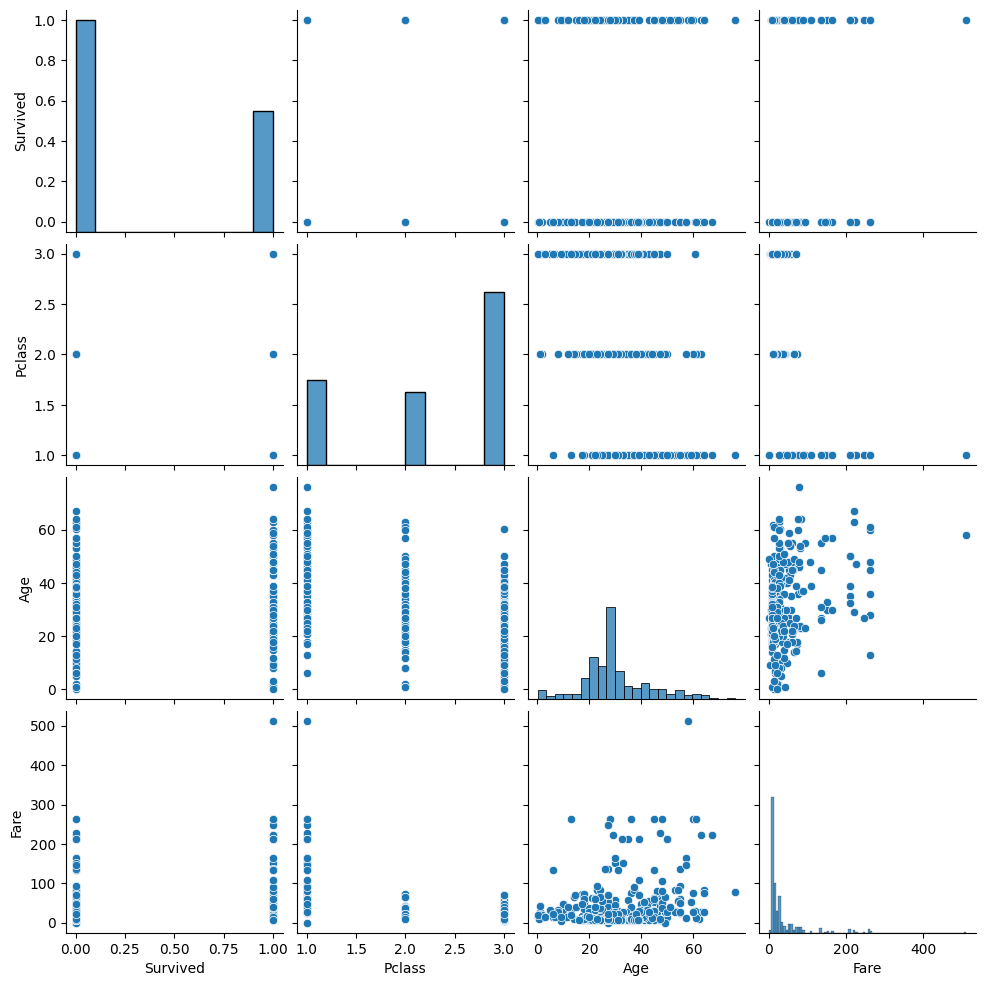

In [64]:
import seaborn as sns
sns.pairplot(df)

(array([ 8.,  3.,  4.,  7., 21., 33., 22., 91., 12., 16., 10., 16., 12.,
         5.,  7.,  5.,  6.,  1.,  0.,  1.]),
 array([-2.01283019, -1.72728302, -1.44173585, -1.15618868, -0.87064151,
        -0.58509434, -0.29954717, -0.014     ,  0.27154717,  0.55709434,
         0.84264151,  1.12818868,  1.41373585,  1.69928302,  1.98483019,
         2.27037736,  2.55592453,  2.8414717 ,  3.12701887,  3.41256604,
         3.69811321]),
 <BarContainer object of 20 artists>)

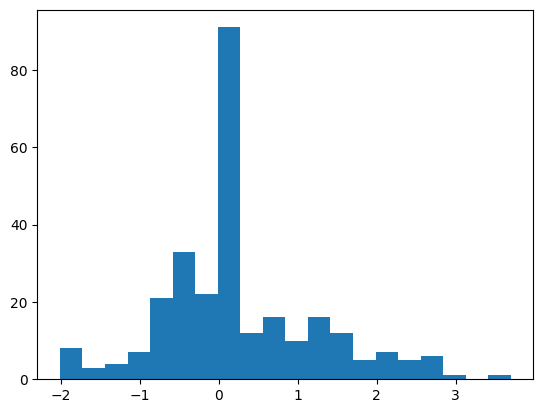

In [66]:
plt.hist(df_robust_scaler[1],bins=20)

(array([177.,  44.,  29.,  10.,   1.,   4.,   1.,   0.,   6.,   1.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.53558995,  0.41061133,  1.35681261,  2.30301389,  3.24921518,
         4.19541646,  5.14161774,  6.08781902,  7.0340203 ,  7.98022159,
         8.92642287,  9.87262415, 10.81882543, 11.76502671, 12.711228  ,
        13.65742928, 14.60363056, 15.54983184, 16.49603313, 17.44223441,
        18.38843569]),
 <BarContainer object of 20 artists>)

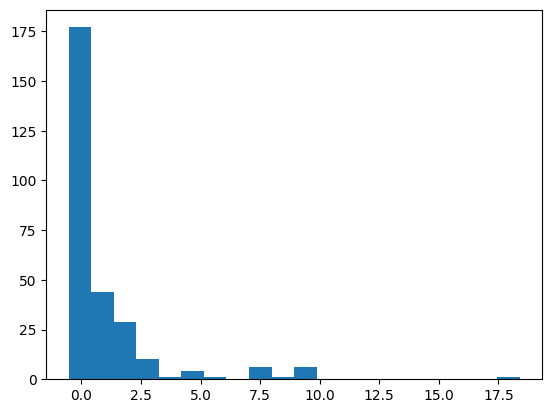

In [67]:
plt.hist(df_robust_scaler[2],bins=20)

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [68]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [71]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [72]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [73]:
import matplotlib.pyplot as plt

In [74]:
import scipy.stats as stat
import pylab

In [75]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()


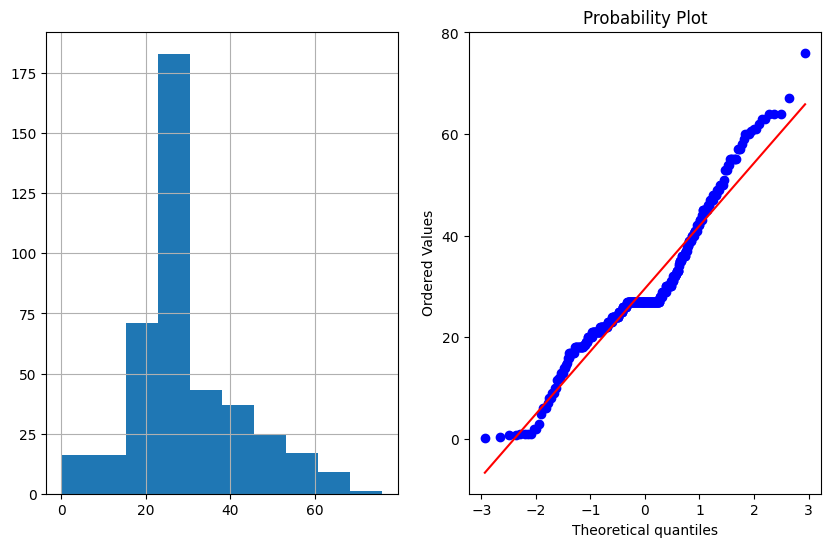

In [76]:
plot_data(df,'Age')

#### Logarithmic Transformation

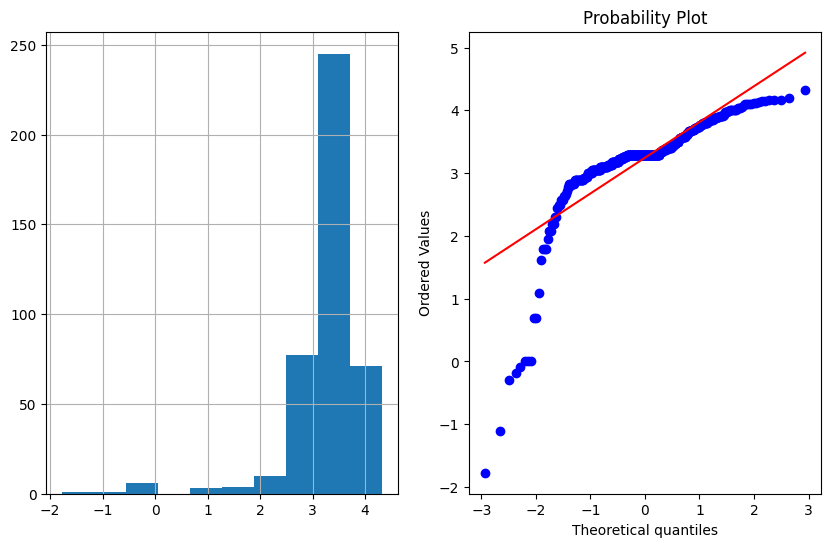

In [77]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal Trnasformation

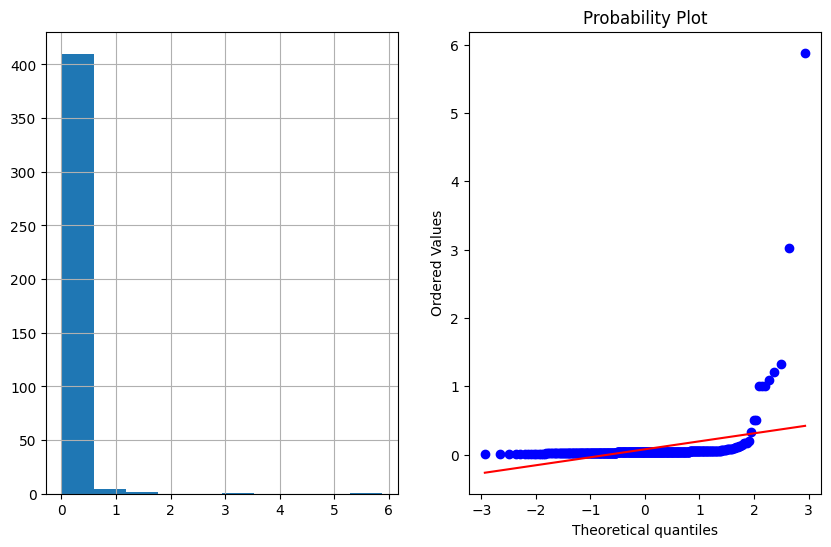

In [78]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

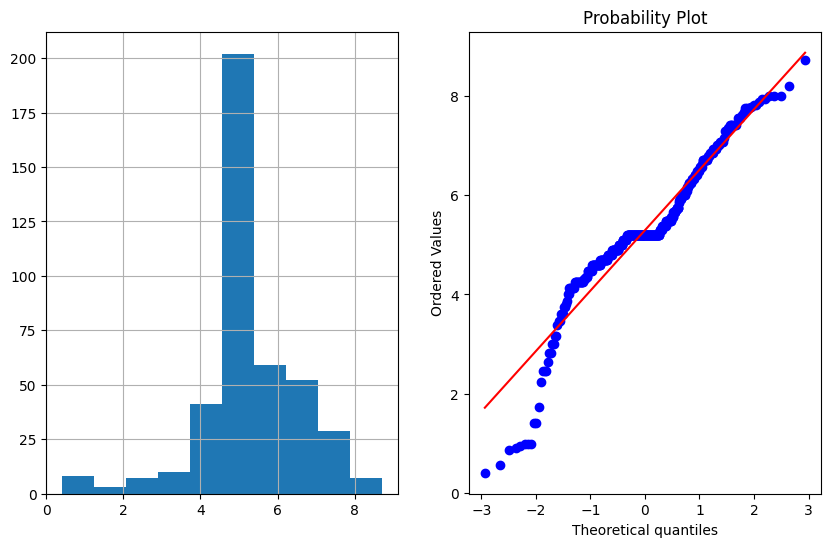

In [79]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

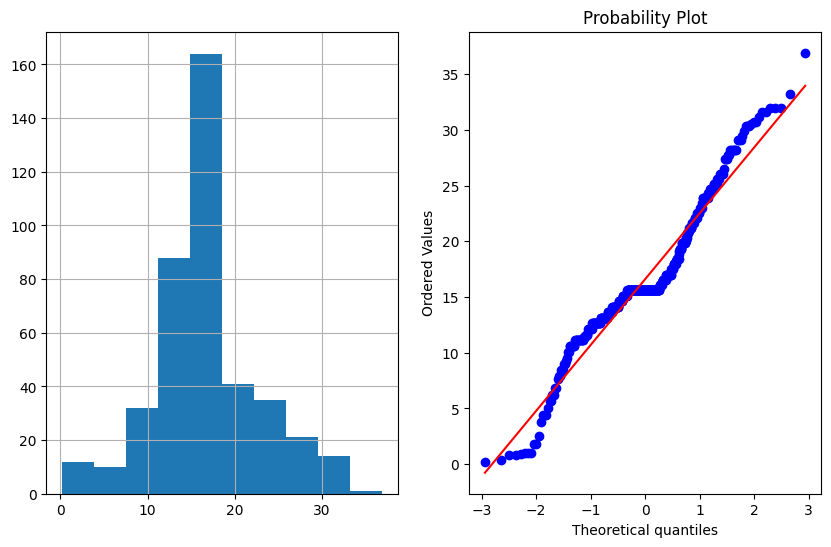

In [80]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [81]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [82]:
print(parameters)

0.7490291483002398


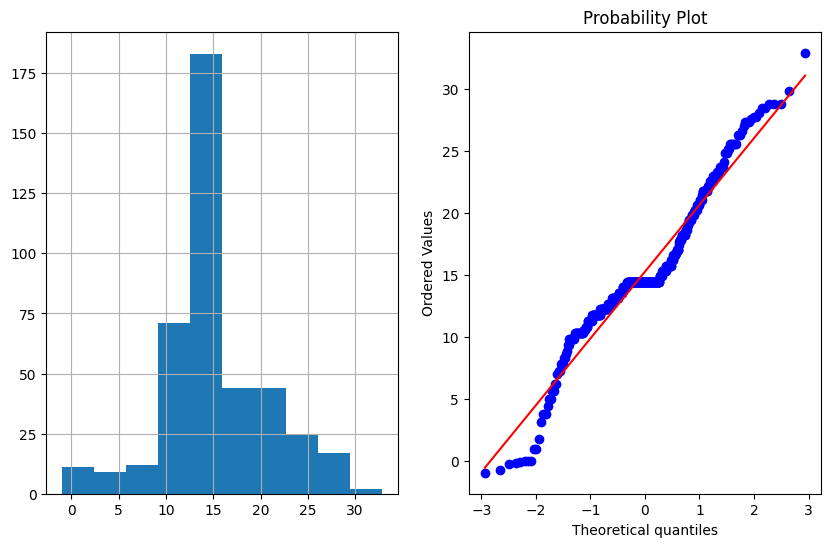

In [83]:
plot_data(df,'Age_Boxcox')

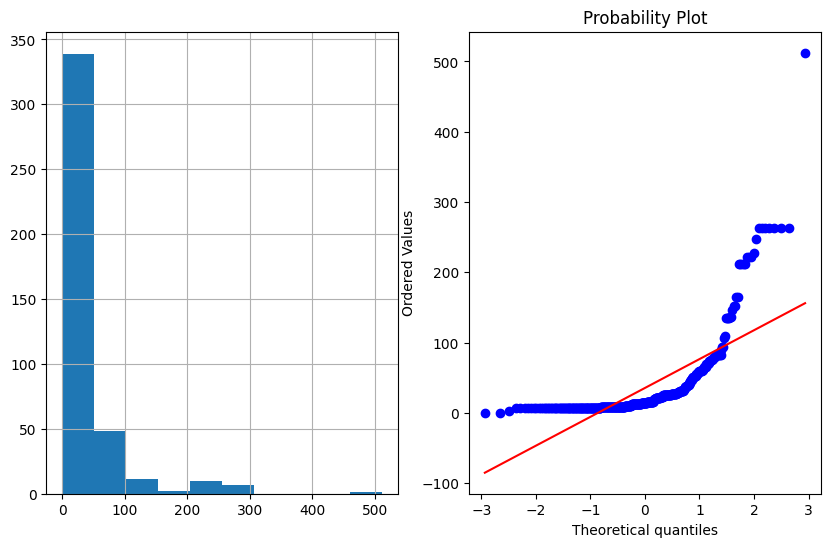

In [84]:
plot_data(df,'Fare')

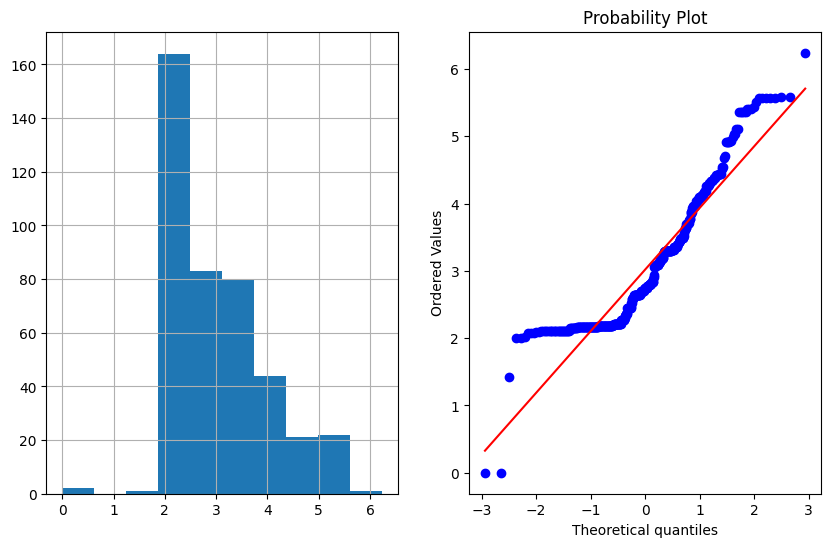

In [85]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

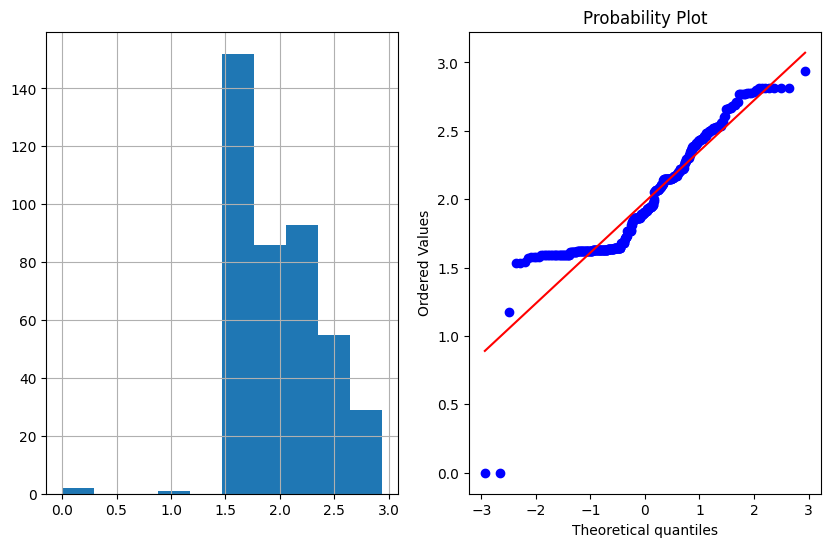

In [86]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')